In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import pycountry as pycountry
import geopandas
%matplotlib inline

plt.style.use('default')

sns.set(style='whitegrid')

In [ ]:
df = pd.read_csv('events.csv', low_memory=False)

df = df.dropna(subset=['city'])
df = df[df.city != 'Unknown']
df = df['country'].value_counts().to_frame()
df['months'] = df.index
df = df.rename(columns={'country': 'events', 'months': 'country'})

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
    
df['country'] = df['country'].replace(countries)
df = df[df.country != 'Venezuela']
df = df[df.country != 'Russia']
df

In [ ]:
plotly.tools.set_credentials_file(username='Florencia-97', api_key='VQgR2XhfedXEFIdPr9TT')

df.head()

data = [dict(
        type = 'choropleth',
        locations = df['country'],
        z = df['events'],
        text = df['country'],
        colorscale = 'Viridis',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = {'title':'Events'},
      ) ]

layout = dict(
    title = 'Events by Country',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot(fig, filename='d3-world-map')


## Dado que obtuvimos que la mayor cantidad de trafico proviene de Brasil, veremos las regiones:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
fp = "BRA_adm1.shp"
map_df = gpd.read_file(fp)
map_df.head(5)

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,33,BRA,Brazil,1,Acre,Estado,State,None,None,POLYGON ((-73.33251190185541 -7.32487916946411...
1,33,BRA,Brazil,2,Alagoas,Estado,State,None,None,(POLYGON ((-35.90152740478516 -9.8618049621582...
2,33,BRA,Brazil,3,Amapá,Estado,State,None,None,(POLYGON ((-50.02402877807612 0.85986202955251...
3,33,BRA,Brazil,4,Amazonas,Estado,State,None,Amazone,POLYGON ((-67.32623291015625 2.029680967331046...
4,33,BRA,Brazil,5,Bahia,Estado,State,None,Ba¡a,(POLYGON ((-38.69708251953125 -17.979028701782...


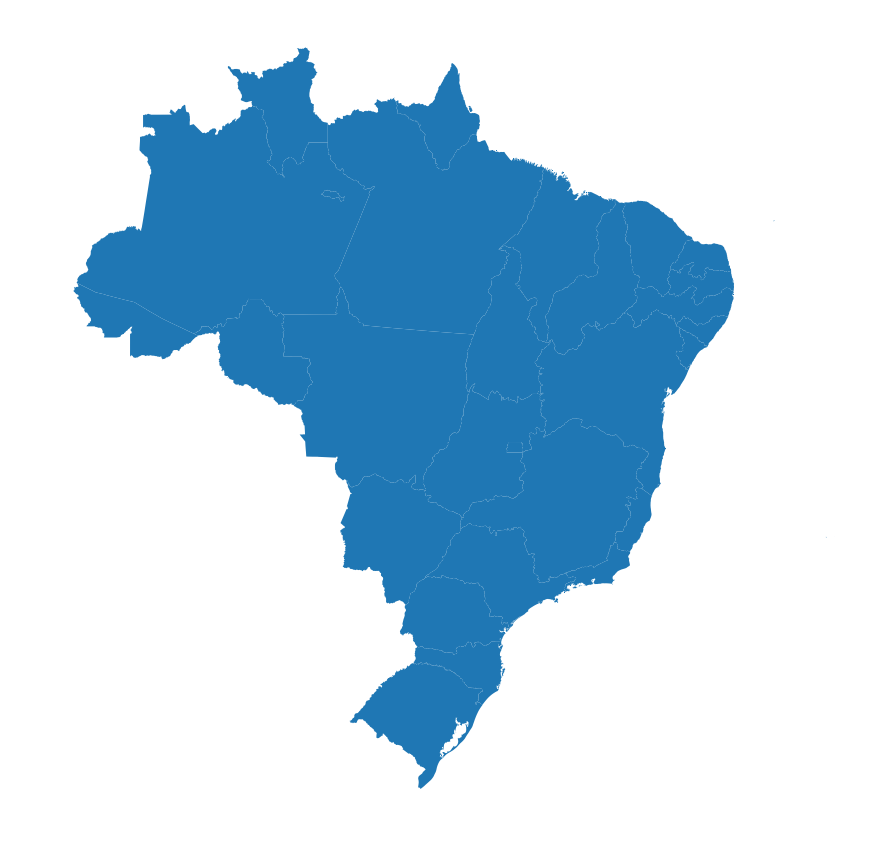

In [3]:

f, ax = plt.subplots(1, figsize=(15, 15))
ax = map_df.plot(ax=ax)
ax.set_axis_off()
plt.show()

#map_df.plot()

In [4]:
df = pd.read_csv('events.csv', low_memory=False)

In [5]:
df.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
filter = df[df["country"]=="Brazil"]

In [7]:
filter2 = filter[filter["region"]!="Unknown"]["region"].value_counts().to_frame()
filter2.reset_index(inplace=True)

In [8]:
merged = map_df.set_index('NAME_1').join(filter2.set_index('index'))
#test2.reset_index(inplace=True)
merged["region"] = merged["region"].fillna(0)

as_list = merged.index.tolist()
idx = as_list.index('Distrito Federal')
as_list[idx] = 'D.F.'
merged.index = as_list
merged.head(555)

,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,region
Acre,33,BRA,Brazil,1,Estado,State,None,None,POLYGON ((-73.33251190185541 -7.32487916946411...,96.0
Alagoas,33,BRA,Brazil,2,Estado,State,None,None,(POLYGON ((-35.90152740478516 -9.8618049621582...,751.0
Amapá,33,BRA,Brazil,3,Estado,State,None,None,(POLYGON ((-50.02402877807612 0.85986202955251...,0.0
Amazonas,33,BRA,Brazil,4,Estado,State,None,Amazone,POLYGON ((-67.32623291015625 2.029680967331046...,600.0
Bahia,33,BRA,Brazil,5,Estado,State,None,Ba¡a,(POLYGON ((-38.69708251953125 -17.979028701782...,5737.0
Ceará,33,BRA,Brazil,6,Estado,State,None,None,(POLYGON ((-38.47541809082026 -3.7009730339050...,0.0
D.F.,33,BRA,Brazil,7,Distrito Federal,Federal District,None,None,POLYGON ((-48.03603363037109 -15.5002202987670...,0.0
Espírito Santo,33,BRA,Brazil,8,Estado,State,None,Espiritu Santo,(POLYGON ((-40.88402938842768 -21.161249160766...,0.0
Goiás,33,BRA,Brazil,9,Estado,State,None,Goiáz|Goyáz,POLYGON ((-50.15817260742188 -12.4123792648315...,0.0
Maranhão,33,BRA,Brazil,10,Estado,State,None,São Luíz de Maranhão,(POLYGON ((-42.12374877929688 -2.8006939887999...,0.0


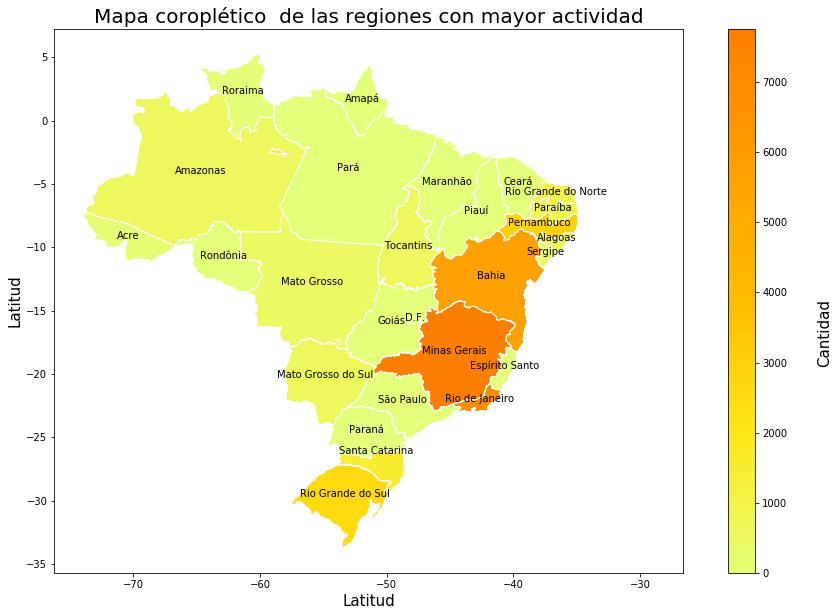

In [9]:
ax = merged.plot(column="region", cmap='Wistia', figsize=(16, 10),edgecolor="white",legend=True)
ax.set_title("Mapa coroplético  de las regiones con mayor actividad",fontsize=20)
ax.text(-16, -15, 'Cantidad',
        rotation='vertical',fontsize=15)

ax.set_xlabel("Latitud",fontsize=15)
ax.set_ylabel("Latitud",fontsize=15)
merged.apply(lambda x: ax.annotate(s=x.name, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
